In [13]:
import os
import statistics
import json
import glob
from matplotlib import pyplot as plt
from posixpath import basename
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib
import csv
import scipy.io

In [14]:
# mesh = meshio.read("/home/yiwei/PersonalScript/polyfem/mesh/bar/structed/tet/square_beam_structed_25.msh")
path="/home/yiwei/results_null_test/2d/unstruct/refine/AMGCL_0.0/square_beam2d_2.5/bar_2d/P1/ref3/block1/Thread8/0/output"
mesh=scipy.io.mmread(path+"/points.mtx")
meshpoints=mesh.toarray()
p_save=np.reshape(meshpoints,(meshpoints.shape[0],2))
# p_save=np.reshape(mesh.points,(mesh.points.shape[0]*3,1))
scipy.io.mmwrite(path+"/vecpoints.mtx",p_save)

In [36]:
class Result(object):
    def __init__(self,iter,mat_size):
        self.iter=iter
        self.mat_size=mat_size

In [37]:
def sort_func(result):
    return result.mat_size    
def get_iter(result_list):
    relist=[]
    for result in result_list:
        relist.append(result.iter)
    return relist
def get_mat_size(result_list):
    relist=[]
    for result in result_list:
        relist.append(result.mat_size)
    return relist

In [45]:
cmap=['b','g','r','c','m','y','k','blueviolet','chartreuse']
def fit(ax_,xdata,ydata,label_,cmap_,cindex_):
    # ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    for i in range(len(xdata)):
        ax_.annotate('%d'%ydata[i], (xdata[i], ydata[i]))
    ax_.plot(xdata,ydata,color=cmap_[cindex_],label=label_,marker='o')

Text(0, 0.5, 'Iterations')

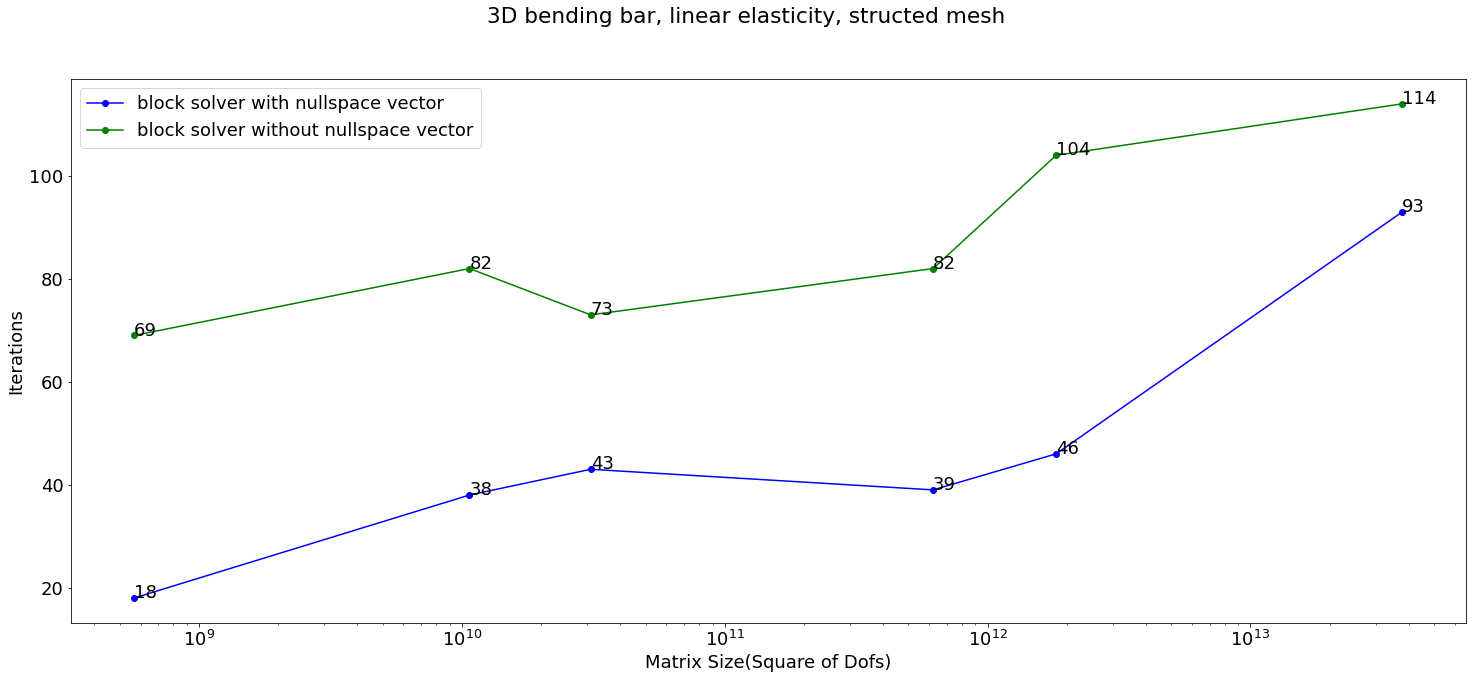

In [48]:
'''Structed mesh'''
mesh_25=[10697351184,621106338609,37837298347209]
mesh_15=[566820864,30927794769,1824452622729]
null_25=[38,39,93]
null_15=[18,43,46]
block_25=[82,82,114]
block_15=[69,73,104]
null_list=[]
block_list=[]
for iter,mesh in zip(null_25,mesh_25):
    null_list.append(Result(iter,mesh))
for iter,mesh in zip(null_15,mesh_15):
    null_list.append(Result(iter,mesh))
for iter,mesh in zip(block_25,mesh_25):
    block_list.append(Result(iter,mesh))
for iter,mesh in zip(block_15,mesh_15):
    block_list.append(Result(iter,mesh))
null_list.sort(key=sort_func)
block_list.sort(key=sort_func)
fig,ax=plt.subplots(1,1,figsize=(25,10)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
fit(ax,get_mat_size(null_list),get_iter(null_list),"block solver with nullspace vector",cmap,0)
fit(ax,get_mat_size(block_list),get_iter(block_list),"block solver without nullspace vector",cmap,1)
ax.legend()
ax.set_xscale('log')

plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.suptitle("3D bending bar, linear elasticity, structed mesh")
ax.set_xlabel("Matrix Size(Square of Dofs)")
ax.set_ylabel("Iterations")

Text(0, 0.5, 'Iterations')

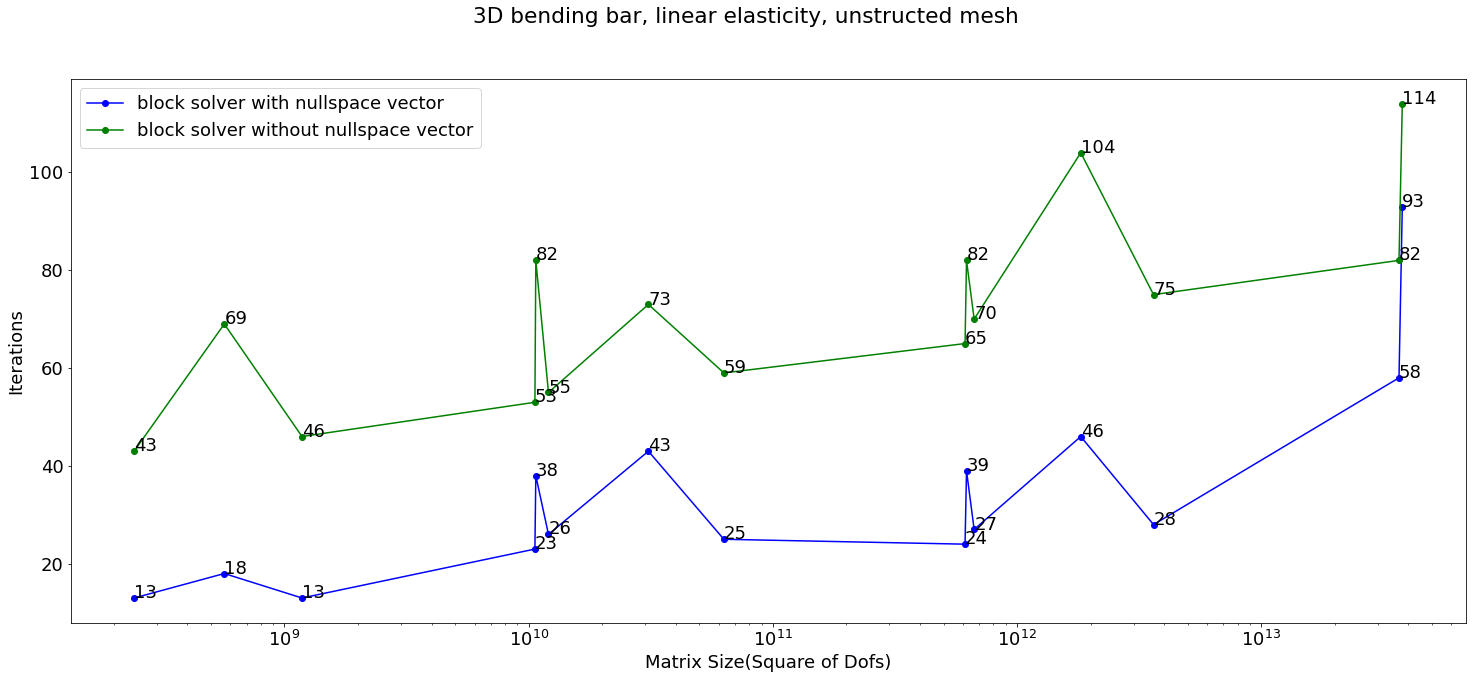

In [49]:
'''Unstructed mesh'''
null_10=[23,24,58]
block_10=[53,65,82]
mesh_10=[10605704256,612623986209,36682924429449]
null_15=[13,25,28]
block_15=[46,59,75]
mesh_15=[1179510336,63021081600,3623620623561]
null_20=[13,26,27]
block_20=[43,55,70]
mesh_20=[242144721,12052746225,667565800209]
for iter,mesh in zip(null_10,mesh_10):
    null_list.append(Result(iter,mesh))
for iter,mesh in zip(null_15,mesh_15):
    null_list.append(Result(iter,mesh))
for iter,mesh in zip(null_20,mesh_20):
    null_list.append(Result(iter,mesh))
for iter,mesh in zip(block_20,mesh_20):
    block_list.append(Result(iter,mesh))
for iter,mesh in zip(block_15,mesh_15):
    block_list.append(Result(iter,mesh))
for iter,mesh in zip(block_10,mesh_10):
    block_list.append(Result(iter,mesh))
null_list.sort(key=sort_func)
block_list.sort(key=sort_func)
fig,ax=plt.subplots(1,1,figsize=(25,10)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
fit(ax,get_mat_size(null_list),get_iter(null_list),"block solver with nullspace vector",cmap,0)
fit(ax,get_mat_size(block_list),get_iter(block_list),"block solver without nullspace vector",cmap,1)
ax.legend()
ax.set_xscale('log')
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.suptitle("3D bending bar, linear elasticity, unstructed mesh")
ax.set_xlabel("Matrix Size(Square of Dofs)")
ax.set_ylabel("Iterations")